In [143]:
import networkx as nx
import matplotlib.pyplot as plt
import random

G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (1, 3), (4, 2), (4, 3), (5, 4), (5, 1), (3, 5), (0, 1), (0, 2), (0, 3), (0, 5),
                  (5, 6), (6, 7), (7, 8), (9, 6), (10, 9), (10, 7), (8, 10), (8, 6), (9, 8),
                  (18, 11), (18, 13), (18, 14), (13, 14), (15, 11), (18, 16), (15, 16), (13, 17), (14, 17), (14, 15),
                  (17, 11), (16, 13),
                  (3, 9), (8, 3), (17, 5), (12, 15), (5, 14), (4, 17)
                 ])
pos = nx.spring_layout(G)

# groundtruth partition
G.add_nodes_from([(i,{"U": 1, "cas 1": 0, "cas 2": 0, "cas 3": 0, "cas 4": 0})for i in range(6)] +
                 [(i,{"U": 2, "cas 1": 0, "cas 2": 0, "cas 3": 0, "cas 4": 0})for i in range(6, 11)] +
                 [(i,{"U": 3, "cas 1": 0, "cas 2": 0, "cas 3": 0, "cas 4": 0})for i in range(11, 19)])
# random partition
# G.add_nodes_from([(i,{"V": random.randrange(1, 4)})for i in range(19)])
G.add_nodes_from([(i,{"V": 1, "cas 1": 0, "cas 2": 0, "cas 3": 0, "cas 4": 0})for i in [0, 1, 2, 3, 4, 5, 17, 14, 13]] +
                 [(i,{"V": 2, "cas 1": 0, "cas 2": 0, "cas 3": 0, "cas 4": 0})for i in [10, 7, 6, 8, 9]] +
                 [(i,{"V": 3, "cas 1": 0, "cas 2": 0, "cas 3": 0, "cas 4": 0})for i in [12, 15, 16, 11, 18]])

(-0.6092796604362808, 0.865540526012894, -1.041330229346298, 1.130586065589001)

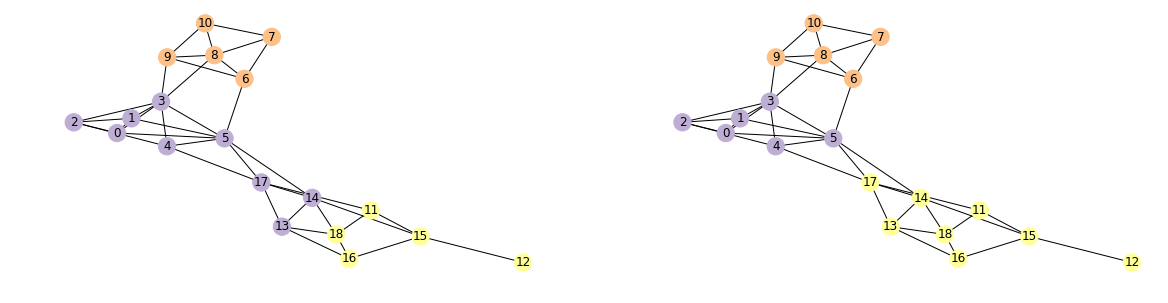

In [144]:
cmap = plt.cm.get_cmap('Accent')
# node_color = [cmap.colors[c] for (n, c) in nxG.nodes.data('colorsindex')]
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1, frameon=False)
nx.draw_networkx(G, pos=pos, node_color=[cmap.colors[G.node[n]["V"]] for n in G.nodes], with_labels=True)
plt.axis('off')
plt.subplot(1, 2, 2, frameon=False)
nx.draw_networkx(G, pos=pos, node_color=[cmap.colors[G.node[n]["U"]] for n in G.nodes], with_labels=True)
plt.axis('off')

In [160]:
# Common pair
import itertools
i = [1, 1, 1, 1]
for n1, n2 in itertools.combinations(list(range(19)), 2):
    if G.node[n1]["U"] == G.node[n2]["U"] and G.node[n1]["V"] == G.node[n2]["V"]:
        G.node[n1]["cas 1"], G.node[n2]["cas 1"] = (i[0], ) * 2
        i[0] += 1
    elif G.node[n1]["U"] != G.node[n2]["U"] and G.node[n1]["V"] == G.node[n2]["V"]:
        G.node[n1]["cas 2"], G.node[n2]["cas 2"] = (i[1], ) * 2
        i[1] += 1
    elif G.node[n1]["U"] == G.node[n2]["U"] and G.node[n1]["V"] != G.node[n2]["V"]:
        G.node[n1]["cas 3"], G.node[n2]["cas 3"] = (i[2], ) * 2
        i[2] += 1
    elif G.node[n1]["U"] != G.node[n2]["U"] and G.node[n1]["V"] != G.node[n2]["V"]:
        G.node[n1]["cas 4"], G.node[n2]["cas 4"] = (i[3], ) * 2
        i[3] += 1
print(i)
len(list(itertools.combinations(list(range(19)), 2)))

[39, 19, 16, 101]


171

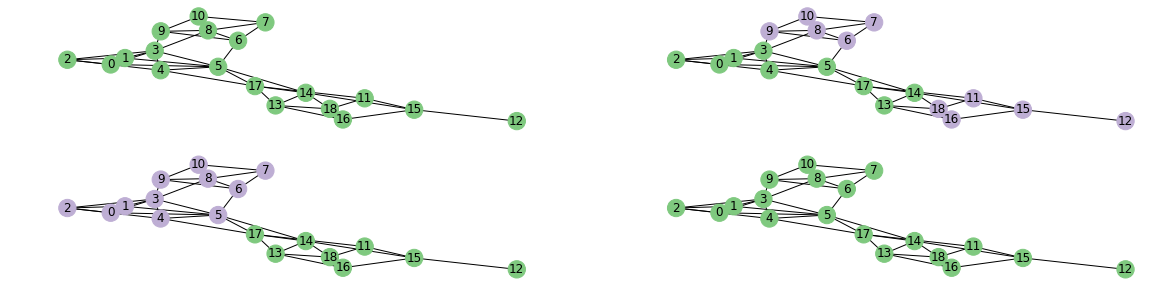

In [159]:
cmap = plt.cm.get_cmap('Accent')
# node_color = [cmap.colors[c] for (n, c) in nxG.nodes.data('colorsindex')]
plt.figure(figsize=(20, 5))
for p in range(1, 5):
    coloration = [cmap.colors[G.node[n][f"cas {p}"] == 0] for n in G.nodes]
    plt.subplot(2, 2, p, frameon=False)
    nx.draw_networkx(G, pos=pos,
                     node_color=coloration,
                     with_labels=True)
    plt.axis('off')